In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
import random
from qiskit.extensions import UnitaryGate
from QPCA.preprocessingUtilities.preprocessing_matrix_utilities import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit,state_vector_tomography

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [4]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [6]:
state_vector_tomography(qc,n_shots=8000,qubits_to_be_measured=[0])

{'0': 0.7075485849042453, '1': -0.7066647012551285}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

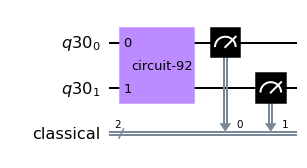

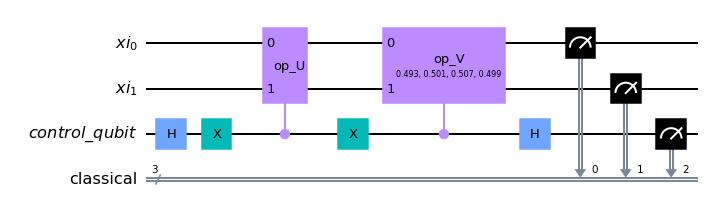

{'00': 0.4930770730829005,
 '01': -0.501373114556415,
 '10': 0.50658168146904,
 '11': -0.4988737315193094}

In [7]:
state_vector_tomography(qc,n_shots=8000,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [8]:
resolution=8
matrix_dimension=4
lista=list(range(0,2**resolution))
eigenvalues_list=[0.65,0.25,0.06,0.04]


In [9]:
#4747
seed=4747
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed,eigenvalues_list=eigenvalues_list)

Matrix:
 [[0.12 0.04 0.06 0.14]
 [0.04 0.31 0.16 0.11]
 [0.06 0.16 0.18 0.18]
 [0.14 0.11 0.18 0.39]]

eigenvalue: 0.03999999999999994 - eigenvector: [ 0.23  -0.357  0.812 -0.4  ]
eigenvalue: 0.059999999999999984 - eigenvector: [-0.882 -0.207  0.303  0.295]
eigenvalue: 0.24999999999999994 - eigenvector: [-0.304  0.772  0.163 -0.534]
eigenvalue: 0.6500000000000001 - eigenvector: [-0.277 -0.483 -0.471 -0.685]


In [10]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [11]:
np.linalg.eig(qpca.input_matrix),qpca.input_matrix

((array([0.65, 0.25, 0.06, 0.04]),
  array([[-0.27669967, -0.30381059, -0.88229208,  0.2295585 ],
         [-0.48274483,  0.77216236, -0.20746302, -0.35732594],
         [-0.47083591,  0.16297368,  0.30291613,  0.81240073],
         [-0.68462272, -0.53376399,  0.29455322, -0.39953239]])),
 array([[0.12165522, 0.03587768, 0.06372792, 0.1444119 ],
        [0.03587768, 0.30822607, 0.16381907, 0.11382963],
        [0.06372792, 0.16381907, 0.18264159, 0.18014713],
        [0.1444119 , 0.11382963, 0.18014713, 0.38747712]]))

[(0.6484375, array([0.27612205, 0.483505  , 0.4720242 , 0.68505039])),
 (0.25, array([-0.27598433,  0.71215321,  0.15491924, -0.48451338])),
 (0.0390625, array([ 0.21593879, -0.36422478,  0.83371788, -0.39885974])),
 (0.05859375, array([ 0.79695487,  0.1777956 , -0.26038023, -0.27639449]))]

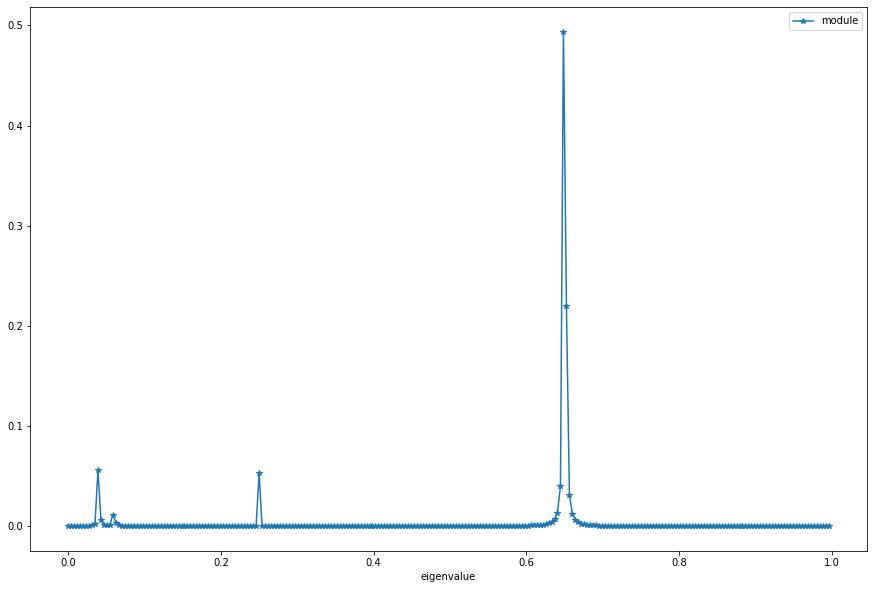

In [12]:
qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True)

In [14]:
qpca.quantum_input_matrix_reconstruction()

array([[0.10751744, 0.04266494, 0.06869975, 0.13981525],
       [0.04266494, 0.28541462, 0.16099758, 0.13131235],
       [0.06869975, 0.16099758, 0.18160061, 0.18214102],
       [0.13981525, 0.13131235, 0.18214102, 0.37368678]])